# Time Series

In [83]:
from fastcore.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from datetime import timedelta

In [5]:
path = Path('../data')

## Overview

Imagine you have a spreadsheet. In the first column you write a bunch of dates. In the second column you write down anything else. You have a time series. Usually the dates are ordered. It is helpful if the second column is meaningful. 

Time series data is extremely common. Daily temperatures, stock prices, ... . Because these are so common all sorts of techniques have been developed to analyze them. Different analysis tools have different uses and vocabulary to articulate where and when these tools work was created.

This chapter will cover ARIMA (Auto Regrissive Integrated Moving Average), Kalman filters, and particle filters. 

## Intuition

Let us imagine that every day we stand on a scale and measure our weight. 

If you are on a diet maybe that number gets smaller. If you fall off the diet every day that number gets bigger. We call these trending. There is an overall directionality of the measurement. 

If we look at a larger time range. Maybe there is weight gain in the winter due to holiday binging and weight loss during the summer so you look good at the beach. This is seasonal data. More generally if we see regular cycles of ups and downs it is periodic. 

Finally you could be relatively stable. Some days you weigh a little more some days a little less. Maybe you weighed yourself in the morning vs the evening. Maybe you just had a big meal. These are stationary.  

These crude descriptions are the first step in time series analysis. If you can describe in accurate enough detail the price of a stock it is considered a "model". If you can describe how a stock price changes over time this information will be helpful when trying to make a buy or sell decision. 

### Belief

### Hypothesis

## The Data

### Load data

In [6]:
raw = pd.read_csv(path/'eod-quotemedia.csv',parse_dates=['date'])
df = raw.pivot(index='date', columns='ticker',values='adj_close')
df.iloc[:,:5].head(3)


ticker,A,AAL,AAP,AAPL,ABBV
date,,,,,
2013-07-01,29.994186,16.176093,81.138217,53.109173,34.924478
2013-07-02,29.650137,15.819834,80.722073,54.312247,35.428076
2013-07-03,29.705185,16.127950,81.237299,54.612043,35.444862


We have dates and numbers. It is a time series

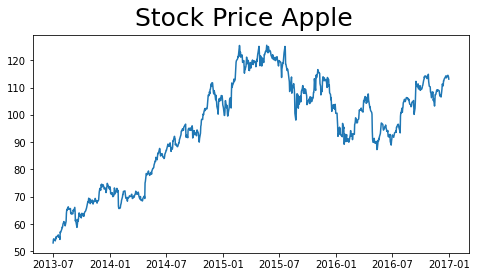

In [7]:
train = df.loc[:pd.Timestamp('2017-1-1 01:00:00')]
valid = df.loc[pd.Timestamp('2017-1-1 01:00:00'):]
# Create Figure
fig,ax = plt.subplots(figsize=(7.8,4))
fig.suptitle("Stock Price Apple",fontsize=25)
# Get data points
_ = train['AAPL']
x1 = _.index
y1 = _.values
sz = 4 # Window Size
# Plot
ax.plot(x1,y1)
plt.show()

Seems like its getting bigger. Trending.

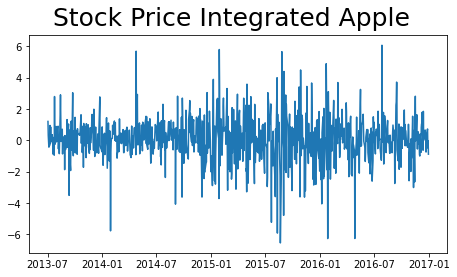

In [8]:
fig,ax = plt.subplots(figsize=(7.5,4))
fig.suptitle("Stock Price Integrated Apple",fontsize=25)

_t=_-_.shift(1)

x1 = _t[1:].index
y1 = _t[1:].values

sz = 4 # Window Size

# Plot
ax.plot(x1,y1)

plt.show()

Looks stationary.

## Models

### ARIMA

ARIMA stands for Auto Regressive integrated moving average. Conceptually arima is very simple. We want to answer the question what is the price of a stock today. According to arima the price any given day is the real value of the price plus some error due to uncertainty. Both the price and the error are treated the same. The price component as a combination of the price component on previous days. The error component is a combination of the error on previous days. 

This seems pretty reasonable, the price today and the price yesterday seem like they should be related. 

Similar with error. If there is a lot of uncertainty about the price of a stock its unlikely that the next day everyone will know exactly how much it is worth. 

There are three paramters that you can adjust for arima models. Using arima requires you to select values for these paramaters. Do a good job selecting these and you get a better answer. 

#### Integrated
The first we consider is I - integrated. ARIMA models work on stationary data. The integrated parameter is a knob that controls this. If you start with a trending series you can dial the knob up and get a stationary series out. Turn it too much and you get junk.

The series of plots below starts with the original series. Each plot cranks up the knob a little more. We want to stop when we think it is stationary. There is a statistical test we can use. For now we will use our eyeballs.

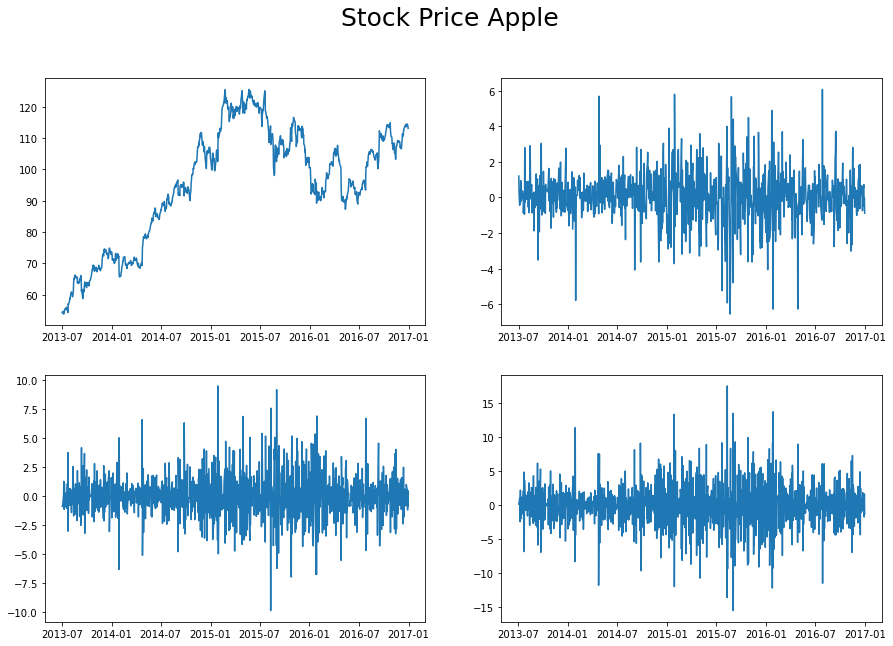

In [78]:
from statsmodels.tsa.stattools import adfuller

# Create Figure
fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
fig.suptitle("Stock Price Apple",fontsize=25)
# Get data points
apple = train['AAPL']
x1 = apple[1:].index
y1 = _.values
sz = 4 # Window Size
_t=_-_.shift(1)


# Plot
ax[0][0].plot(x1[0:],_[1:])
ax[0][1].plot(x1[0:],_.diff().dropna())
ax[1][0].plot(x1[1:],_.diff().diff().dropna())
ax[1][1].plot(x1[2:],_.diff().diff().diff().dropna())

plt.show()

It looks fine after the first one. Our integration parameter will be 1. A non-statistical test is to look at the y axis. In the top right plot it goes from -6 to 6. 

#### Auto Regressive 
The second piece we look at is the AR -  auto regressive. The parameter controls how far back we look. Should we consider yesterdays price as part of our model. Two days ago? Three? 

No great eyeball test for this. Instead we look at a partial correlation plot. This tells you which previous values are most highly correlated with the current value. The blue rectangular box in the rigth plot highlights all the ones that are not correlated. Which is all of them. For this series modeling this doesnt seem like it will get us anything.

For this series the auto regressive term is 0.

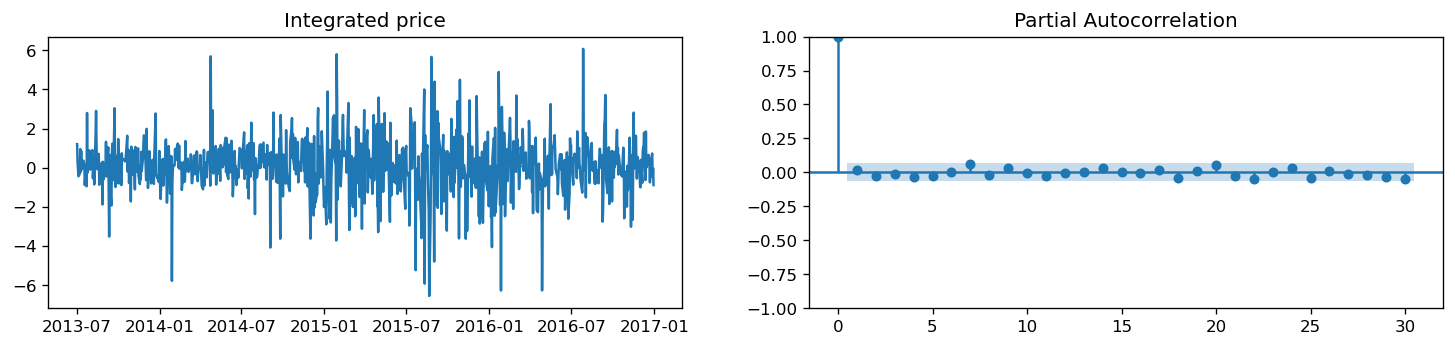

In [110]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,3), 'figure.dpi':120})

fig, ax = plt.subplots(1, 2)
ax[0].plot(_.diff()); ax[0].set_title('Integrated price')
plot_pacf(_.diff().dropna(), ax=ax[1],method='ywm')

plt.show()

#### Moving Average

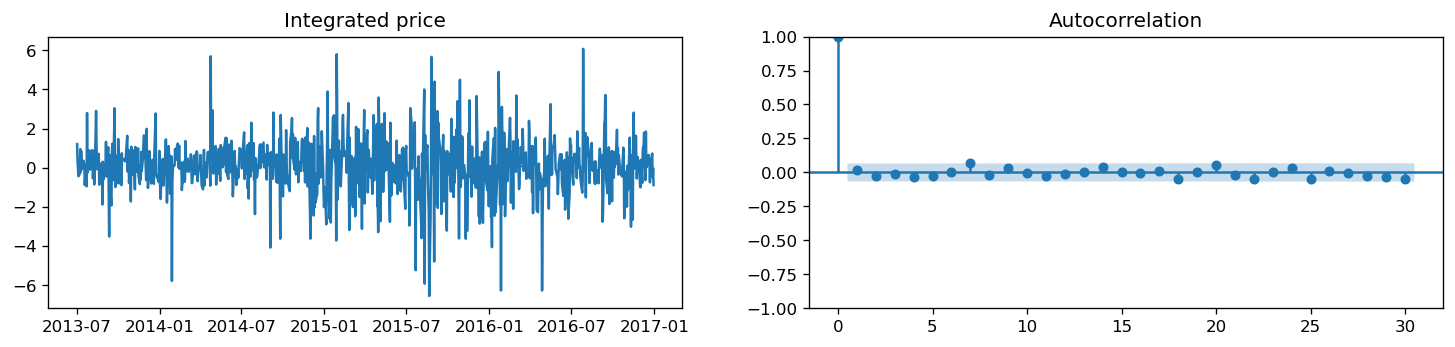

In [112]:
# ACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(15,3), 'figure.dpi':120})

fig, ax = plt.subplots(1, 2)
ax[0].plot(_.diff()); ax[0].set_title('Integrated price')
plot_acf(_.diff().dropna(), ax=ax[1])

plt.show()

### Kalman Filters

### Particle Filters

### RNN